In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(300L, 451L, 3L)


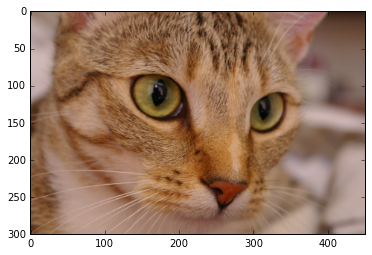

In [2]:
from skimage import data

color_image = data.chelsea()

print(color_image.shape)
plt.imshow(color_image);

In [12]:
red_channel = color_image[:, :, 0]  # or color_image[..., 0]

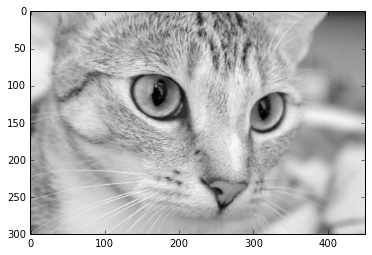

In [14]:
plt.imshow(red_channel, cmap='gray');

In [ ]:
red_image = color_image[..., 0] # color_image[:,:,0]
green_image = color_image[:,:,1]
blue_image = color_image[:,:,2]

In [16]:
image = data.camera()
skdemo.imshow_with_histogram(image);

NameError: name 'skdemo' is not defined

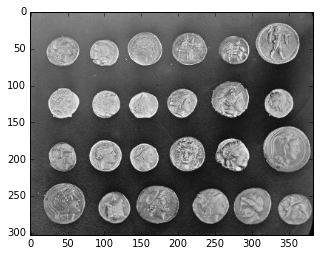

In [20]:
import matplotlib.pyplot as plt
from skimage import data
coins = data.coins()
plt.imshow(coins, cmap='gray')

In [27]:
from skimage.morphology import watershed
from scipy import ndimage as ndi
from skimage.filters import sobel
markers = np.zeros_like(coins)
elevation_map = sobel(coins)
segmentation = watershed(elevation_map, markers)
segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndi.label(segmentation)

In [30]:
print(len(labeled_coins))

303


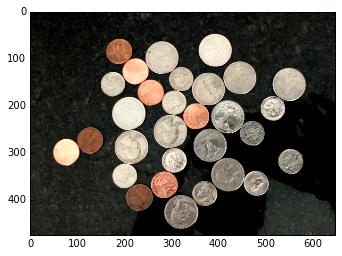

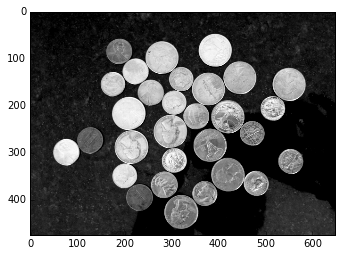

In [31]:

import matplotlib.pyplot as plt
from skimage import color, feature
%matplotlib inline


im = plt.imread('fig/quarters_dimes_pennies.png')
gray_im = color.rgb2gray(im)

plt.imshow(im)
plt.figure()
plt.imshow(gray_im, cmap='gray')

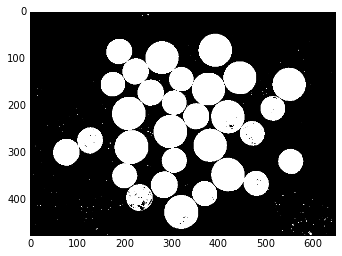

In [36]:
from skimage.filters import threshold_li
from __future__ import division, print_function

coin_thresh = threshold_li(gray_im)
#print 'Selected a threshold of %.2f' %coin_thresh
coin_mask = gray_im > coin_thresh
plt.imshow(coin_mask, cmap='gray');

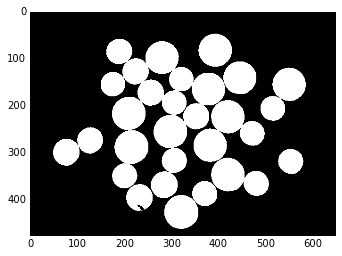

In [37]:
from skimage import morphology
from skimage.morphology import disk

coin_mask_clean = morphology.remove_small_objects(coin_mask)
coin_mask_clean = ~morphology.remove_small_objects(~coin_mask_clean)

plt.imshow(coin_mask_clean, cmap='gray');

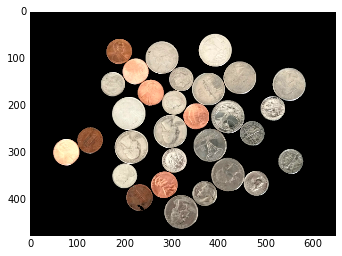

In [38]:
bg_mask = ~coin_mask_clean

im[bg_mask] = 0
gray_im[bg_mask] = 0
plt.imshow(im);

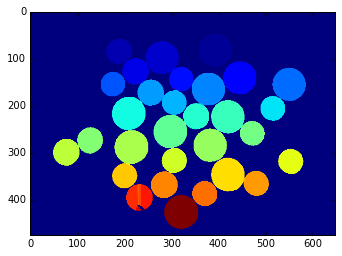

In [41]:
from scipy import ndimage as ndi
from skimage import measure
import numpy as np
#from BKlib import print_image_properties

def watershed_segmentation(mask):
    distance_im = ndi.distance_transform_edt(mask)
    peaks = feature.peak_local_max(distance_im, indices=True)
    peaks_im = np.zeros(distance_im.shape, dtype=bool)
    for row, col in peaks:
        peaks_im[row, col] = 1
    markers_im = measure.label(peaks_im)
    labelled_im = morphology.watershed(-distance_im, markers_im, mask=coin_mask_clean)
    return labelled_im


labelled_coin_im = watershed_segmentation(coin_mask_clean)

#print 'There are %i coins in the image.' % (len(np.unique(labelled_coin_im)) - 1)
plt.imshow(labelled_coin_im);

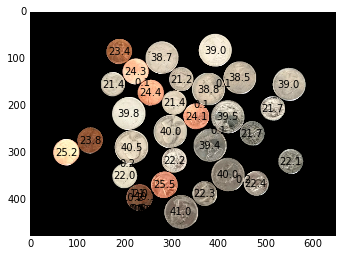

In [42]:
regions = measure.regionprops(labelled_coin_im)

plt.imshow(im)

for region in regions:
    y, x = region.centroid
    area = region.area
    area_str = '%.1f' % (area/100)
    plt.text(x, y, area_str, color='k', ha='center', va='center')  # ha, va = horizontal alignment,vertical aligment

Total value of coins is 5.47


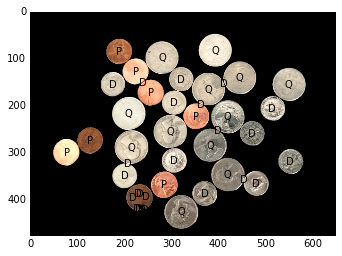

In [60]:
# I got these thresholds by examining area-labeled plot (and by trial-and-error) 
max_dime_area = 2300
min_quarter_area = 3800

num_dimes = 0
num_quarters = 0
num_pennies = 0

plt.imshow(im)

for region in regions:
    y, x = region.centroid
    area = region.area
    if area <= max_dime_area:  # small regions are dimes
        coin_name = 'D'
        num_dimes += 1
    elif area >= min_quarter_area:  # big regions are quarters
        coin_name = 'Q'
        num_quarters += 1
    else:  # everything else is pennies
        coin_name = 'P'
        num_pennies += 1
    plt.text(x, y, coin_name, ha='center', va='center')  # ha, va = horizontal alignment,vertical aligment
    
value = (25.*num_quarters + 10.*num_dimes + num_pennies)/100 
#print('%i quarters, %i dimes, %i pennies' % (num_quarters, num_dimes, num_pennies)
print('Total value of coins is', value)